In [1]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [2]:
df = pd.read_csv("../Yoran/combined.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
# Select Netherlands only!!
# df = df[df['Country/Region']=="Netherlands"]

In [3]:
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Netherlands,2020-01-22,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738
2020-01-23,Netherlands,2020-01-23,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738
2020-01-24,Netherlands,2020-01-24,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738
2020-01-25,Netherlands,2020-01-25,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738
2020-01-26,Netherlands,2020-01-26,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738


# 1. Feature engineering

##### Add columns

In [4]:
df['Month'] = df['Date'].map(lambda x: 100*x.month)
df = df.drop(['Date','Country/Region'],axis=1)

## NaN handling

In [5]:
df.isna().any().any()

False

# 2. Feature selection

In [6]:
df.head()

,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-23,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-24,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-25,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100
2020-01-26,0,0,0,3/23/2020,5.0,0,3.0,7.0,8.0,1,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100


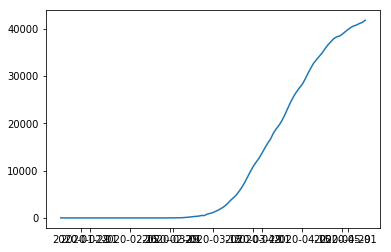

In [7]:
#Check if data is still sorted by date
plt.plot(df.Confirmed)

##### Code below not necessary if we only selected Netherlands

In [14]:
# df = pd.read_csv("df_FE.csv")
# df.Date = pd.to_datetime(df.Date)
# df = df.sort_values(by=['Date'])
# df = df.set_index(df.Date)
# df.head()

In [105]:
#Put target columns to front
# cols =  df.columns
# cols = list(cols[2:5]) + list(cols[0:2]) + list(cols[5:])
# df = df[cols]
# df.head()

In [20]:
# df.to_csv("NL_df.csv")

##### Auto encode columns with dtype object

In [8]:
#Show which columns have dtype object
for i in df.columns: 
    if df[i].dtype == object:
        print(i)

start_date
covid19_first_date
Urban_pop_pct
first_school_closure_date


In [9]:
label_encoder = LabelEncoder()
# df['Country/Region'] = label_encoder.fit_transform(df['Country/Region']).astype('float64')
df['start_date'] = label_encoder.fit_transform(df['start_date']).astype('float64')
df['covid19_first_date'] = label_encoder.fit_transform(df['covid19_first_date']).astype('float64')
df['first_school_closure_date'] = label_encoder.fit_transform(df['first_school_closure_date']).astype('float64')
df['Urban_pop_pct'] = df['Urban_pop_pct'].map(lambda x: x.lstrip('%').rstrip('%')).astype(float)/100

In [26]:
# Show all dtypes 
# df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 107 entries, 2020-01-22 to 2020-05-07
Data columns (total 61 columns):
Confirmed                                                      107 non-null float64
Deaths                                                         107 non-null float64
Recovered                                                      107 non-null float64
start_date                                                     107 non-null float64
lockdown_severity                                              107 non-null float64
leasure_shopping_prohibited                                    107 non-null float64
maximum_together                                               107 non-null float64
mentality_grade                                                107 non-null float64
government_performance                                         107 non-null float64
kindergarten_open_to_vital                                     107 non-null float64
highschool_open_to_vital            

##### Convert all dtypes to a float value

In [10]:
df = df.apply(pd.to_numeric)
df = df.astype(float)
# df.info()

##### Drop columns that are useless and have no variable values

In [11]:
for i in df.columns: 
    if df[i].max() == df[i].mean():
        df = df.drop([i],axis=1)

In [12]:
df.head()

,Confirmed,Deaths,Recovered,Urban_pop_pct,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.92,74.65,3.32,6.4,16.4,64.8,18.8,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100.0
2020-01-23,0.0,0.0,0.0,0.92,74.65,3.32,6.4,16.4,64.8,18.8,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100.0
2020-01-24,0.0,0.0,0.0,0.92,74.65,3.32,6.4,16.4,64.8,18.8,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100.0
2020-01-25,0.0,0.0,0.0,0.92,74.65,3.32,6.4,16.4,64.8,18.8,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100.0
2020-01-26,0.0,0.0,0.0,0.92,74.65,3.32,6.4,16.4,64.8,18.8,...,11.983563,14.721875,16.550938,16.639875,13.895625,10.34735,5.916237,3.490613,9.201738,100.0


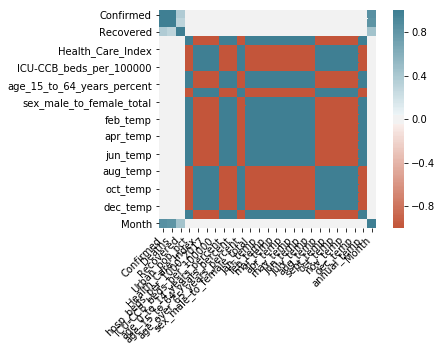

In [14]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

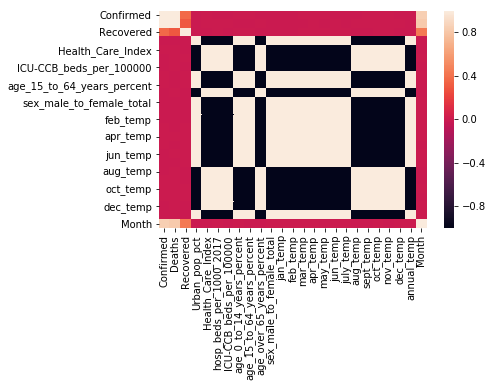

In [13]:
corr = df.corr()
sns.heatmap(corr)
# figure = svm.get_figure()    
# figure.savefig('svm_conf.png', dpi=400)

##### Compare correlation between features

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 

In [16]:
dfNew['Deaths'] = df['Deaths']
cols = list(dfNew.columns)
cols = [cols[-1]] + cols[:-1]
dfNew = dfNew[cols]
dfNew.head()

,Deaths,Confirmed,Recovered,Urban_pop_pct,Health_Care_Index,Month
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.92,74.65,100.0
2020-01-23,0.0,0.0,0.0,0.92,74.65,100.0
2020-01-24,0.0,0.0,0.0,0.92,74.65,100.0
2020-01-25,0.0,0.0,0.0,0.92,74.65,100.0
2020-01-26,0.0,0.0,0.0,0.92,74.65,100.0


In [17]:
# df.head()
dfNew.to_csv("Corrected_df.csv")

# Select columns based on P-value

##### Remove columns that you want to predict

Remove Confirmed, Death and Recovered column you want to predict those

In [347]:
corrected = pd.read_csv("Corrected_df.csv")

In [17]:
selected_columns2

['Country/Region',
 'Date',
 'start_date',
 'lockdown_severity',
 'leasure_shopping_prohibited',
 'maximum_together',
 'mentality_grade',
 'government_performance',
 'kindergarten_open_to_vital',
 'highschool_open_to_vital',
 'university_open_to_vital',
 'going_out_for_dinner_prohibited_all',
 'leaving_the_house_for_no_reason_prohibited_all',
 'public_transportation_prohibited_all',
 'sports_games_prohibited_all',
 'hospital_open_to_vital',
 'none_open_to_vital',
 'none__open_to_vital',
 'bars_closed_to_everyone',
 'highschool_closed_to_everyone',
 'kindergarten_closed_to_everyone',
 'restaurants_closed_to_everyone',
 'shops_other_than_supermarkets_closed_to_everyone',
 'protection_Not at all',
 'protection_Only for any healthcare worker',
 'protection_Only for hospital staff',
 'protection_Sufficient for everyone',
 'covid19_first_date',
 'Population_2020',
 'Density_KM2m',
 'Urban_pop_pct',
 'Health_Care_Index',
 'hosp_beds_per_1000_2017',
 'ICU-CCB_beds_per_100000',
 'age_0_to_14_ye

In [12]:
label_columns = []
label_columns.append(list(selected_columns[0:2]))
label_columns = [item for sublist in label_columns for item in sublist]
label_columns.append(dfNew.columns[0])
label_columns

selected_columns2 = list(selected_columns[2:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                  
    regressor_OLS.summary()
    return x, columns
SL = 0.05

#for confirmed caes
data_modeled, selected_columns3 = backwardElimination(dfNew.iloc[:,3:].values, df.iloc[:,0].values, SL, selected_columns2)

In [13]:
result = pd.DataFrame()
result['Confirmed'] = dfNew.iloc[:,2]
result['Recovered'] = df.iloc[:,1]
result['Death'] = dfNew.iloc[:,0]

In [18]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns3)

In [26]:
data[data.index.duplicated()]

,Country/Region,Date,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,highschool_open_to_vital,...,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,jan_temp,apr_temp


In [24]:
sns.distplot(data.iloc[0][result['Confirmed']==0], color='g', label = 'benign')

ValueError: cannot reindex from a duplicate axis

TypeError: Cannot index by location index with a non-integer key

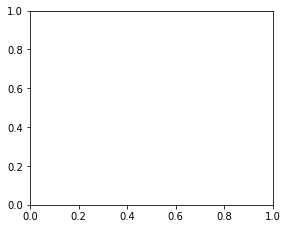

In [23]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data.iloc[i][result['Confirmed']==0], color='g', label = 'benign')
#     sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##### Visualize the selected features

# Breast cancer

In [15]:
bc = pd.read_csv("data.csv")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
bc = bc.iloc[:,1:-1]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Transform categorical to numerical

In [17]:
label_encoder = LabelEncoder()
bc.iloc[:,0] = label_encoder.fit_transform(bc.iloc[:,0]).astype('float64')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Set correlation matrix

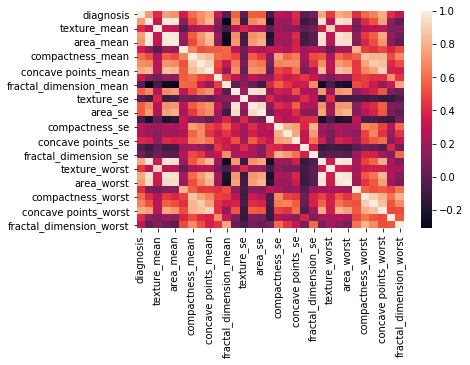

In [18]:
corr = bc.corr()
sns.heatmap(corr)

In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = bc.columns[columns]
bc = bc[selected_columns]

In [24]:
selected_columns = list(selected_columns[1:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(bc.iloc[:,1:].values, bc.iloc[:,0].values, SL, selected_columns)

In [26]:
result = pd.DataFrame()
result['diagnosis'] = bc.iloc[:,0]

In [27]:
bc.iloc[:,1:].values

array([[17.99   , 10.38   ,  0.1184 , ...,  0.7119 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.2416 ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.4504 ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.3403 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.9387 ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [29]:
df.iloc[:,3:].values

array([[Timestamp('2020-01-22 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-23 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-24 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       ...,
       [Timestamp('2020-05-05 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-06 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-07 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391]], dtype=object)